# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# A. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**MY ANSWER:**

We have a cross sectional data set (not a time series) and we will use supervised learning to find what variables (columns and combinations of columns) most closely correlate with the price.
We will have success when we have identified which of the columns/variables are most important to create  a model that predicts the expected price that a car will sell for.

# B. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Reading in the data to a Pandas Data Frame**

We need to read in the data file so we can examine its structure (rows and columns):

In [1]:
# ================================
# Global warning configuration
# ================================
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning
)

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# unclean_cars_data = original data before data preparation/cleaning
unclean_cars_data = pd.read_csv("data/vehicles.csv")

# The data as it is being cleaned is 'cars' (shorter for simplicity):
cars = []

# Setting a global unchanging reference to keep track
# of changes from the initial number of rows:
INITIAL_ROW_COUNT = len(unclean_cars_data)

print(unclean_cars_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2]:
print(unclean_cars_data.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [3]:
for col in unclean_cars_data.columns:
    print(f"\nColumn: {col}")
    print(unclean_cars_data[col].unique())


Column: id
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

Column: region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockto

**Read vehicles.csv into an Microsoft Excel Spreadsheet**

When using extremely large datasets, this step might be impractical. However, it was fine for this set and I believe in making use of all resources available so as to get the best understanding. This allowed: 

1. Sorting on different columns such as price to see some ridiculously high prices that did not match the details of the vehicles.
2. Sorting on VIN and see many entries with the same VIN which is meant to be an individual number for a car. Many of these rows had all the details the same excep the state and/or region.

### My observations of the data:


1. Though the unique values output is lengthy, it is worth the relatively small investment in time to scroll down it. It showed what all the different kinds of values are and how few typos and nonsense data there is overall. Most columns contain useful values (apart from NaNs). For example 'type' has no entries like: "speedy" or "the best ever." 
2. We can see that there is an extremely large number of different 'regions' - too many to be useful, especially when we also have the 'state' column which will have a maximum of about 50.
3. We can see many empty data cells (NaN) so we have to further examine and decide what to do with rows that contain NaN values.
4. It was also observed that a number of rows only have the following values: region, price and state. This is shown to be quite common in the 'head' 5 rows but also in the MS Excel file. It would seem necessary to remove these rows but in doing so it will be important to see just how many rows this removes (percentage of total rows) and whether the data remains sufficiently large to be used effectively.
5. We can see some columns such as the VIN number for each individual car that will be of little use except to determine if there are repeated rows (duplicates) for the very same car.
6. Overall we can see mostly non-numerical values (categorical values) that will need to be converted to a more readily usable form via One-hot encoding.

# C. Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### 1. Set up a row counting function to keep track of row removal:

How much data are we removing? This function will be called to report this:

In [4]:

def report_change(rows_before, df_after, step_description="this step"):
    """
    Report row-count changes for a data-cleaning step.

    This function reports how many rows were removed during a single
    data-cleaning operation and tracks cumulative removals relative to
    the original dataset size.

    Designed for large datasets: only row counts are used, and the
    DataFrame is passed by reference (no copying).

    Assumes `INITIAL_ROW_COUNT` is defined once at data-load time.

    Parameters
    ----------
    rows_before : int
        Number of rows before the cleaning step
    df_after : pd.DataFrame
        DataFrame after the cleaning step
    step_description : str, optional
        Short description of the cleaning step
    """
    global INITIAL_ROW_COUNT

    rows_after = len(df_after)

    removed = rows_before - rows_after
    total_removed = INITIAL_ROW_COUNT - rows_after

    percent_this = (removed / INITIAL_ROW_COUNT) * 100 if rows_before > 0 else 0
    percent_total = (total_removed / INITIAL_ROW_COUNT) * 100

    print(f"Row count before: {rows_before}")
    print(f"Row count after: {rows_after}")
    print(f"Rows removed this step: {removed}")
    print(f"Rows removed were {step_description}.")
    print(f"Percentage removed in this step: {percent_this:.2f}%")
    print(f"Percentage removed so far: {percent_total:.2f}%")


### 2. Remove mostly empty rows

We want to know if cars (i.e sensible and unique VIN numbers) appear more than once with **ALL** the same information (apart from ID) and then remove them:

In [5]:
len_before=len(unclean_cars_data)

cars = unclean_cars_data.dropna(subset=unclean_cars_data.columns.difference(["id", "price", "region", "state"]), how="all")

report_change(len_before,cars,"missing all data (except the price, region, state)")


Row count before: 426880
Row count after: 426812
Rows removed this step: 68
Rows removed were missing all data (except the price, region, state).
Percentage removed in this step: 0.02%
Percentage removed so far: 0.02%


### 3. Remove fully duplicated rows - only differing by 'id'

We want to know if cars (i.e sensible and unique VIN numbers) appear more than once with **ALL** the same information (apart from ID) and then remove them:

In [6]:
len_before=len(cars)

cars = cars.sort_values("id").drop_duplicates(subset=cars.columns.difference(["id"]), keep="first")

report_change(len_before,cars,"fully duplicated rows (only id differed)")


Row count before: 426812
Row count after: 370621
Rows removed this step: 56191
Rows removed were fully duplicated rows (only id differed).
Percentage removed in this step: 13.16%
Percentage removed so far: 13.18%


### 4. Dealing with mulpitle entries with the same VIN:

Now we want to see what columns might differ for rows that still have the same VIN.

In [7]:
cars_multi_VINs = (
    cars
    .groupby("VIN")
    .nunique()
    .apply(lambda row: row[row > 1].index.tolist(), axis=1)
)

print("Columns with the same VIN but differing only in these columns:")
print(cars_multi_VINs)


Columns with the same VIN but differing only in these columns:
VIN
0                    [id, region, price, year, manufacturer, model,...
00000000000A26444                                                   []
00000000000A35665                                                   []
00000000000A42482                                                   []
00000000000A44554                                                   []
                                           ...                        
ZN661YUA4LX344692                                         [id, region]
ZN661YUL1HX236166                                                   []
ZN661YUL3HX198178                                                   []
ZN661YUS0HX263351                                                   []
ZPBUA1ZL1KLA02237                                  [id, region, state]
Length: 118246, dtype: object


**Observations** Looking at the output above and also the file that was created (and imported into MS Excel for scrolling), it could be seen that:

(1) There are many entires that differ only in the location (id, region, state) and so are probably being listed in multiple places at once to increase exposure and the chance of an interested party.  This means that they are 'polluting' the location information (region & state) and making it less helpful for correlating with the price. We can't know where the car was actually located in real world for those mutiples. Also the region contains such a variety of locations, it would be hard to make use of it as it is. Even using the 'state' risks more time consumption to investigate correlation which may just result in false outcomes because many cars are not physically located in the 'state' that they are listed under (also the multiple entires for one car).

(2) Also from general knowledge, region also has competing factors such as proximity to the ocean can imply more chance of rust issues but population density is often higher along the coast so this may affect the price.


(3) Sorting on VIN in the original Excel file, showed a VIN (00000HDJ810018347) with many multiple entries ...

In [8]:
cols = ["region", "year", "model", "VIN", "state"]
print(cars.loc[cars["VIN"] == "00000HDJ810018347", cols].to_string(index=False))

             region   year                          model               VIN state
dallas / fort worth 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    tx
             denver 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    co
        east oregon 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    or
      new york city 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    ny
      oklahoma city 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    ok
          asheville 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    nc
            atlanta 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    ga
              boise 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    id
             boston 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    ma
            buffalo 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    ny
         charleston 1992.0 land cruiser hdj81 - 80 series 00000HDJ810018347    sc
            chic

So each car listed like this polutes the location columns (region, state) drastically.

**TWO OPTIONS:** Either remove the entire 'region' and the entire 'state' columns (and then remove duplicate rows) **OR** remove the cars/rows where they are listed in multiple locations (it is only one car afterall) so that the location (especially 'state') can be used for the other cars.

**DECISION:**

- Remove the rows with the same details except where the 'region' is the only difference so we can still use the 'state' column.
- Remove the 'region' column since some sense of location is capture by the 'state' column.

In [9]:
# First, remove the duplicated rows that differ only by location: 
len_before=len(cars)

cars = cars.drop_duplicates(
    subset=cars.columns.difference(["id", "region", "state"]),
    keep="first"
)
report_change(len_before,cars,"mostly duplicated rows (only location differed)")

Row count before: 370621
Row count after: 248689
Rows removed this step: 121932
Rows removed were mostly duplicated rows (only location differed).
Percentage removed in this step: 28.56%
Percentage removed so far: 41.74%


In [10]:
# Second remove the region column/feature (so no row/data changes):
cars = cars.drop(columns=["region"])


### 5. Same car but different price? So keep lowest price row

When the vehicles.csv file was loaded into Excel and sorted by VIN, this revealed the following types of duplicate entries:

In [11]:
# An example for VIN = 1.07044E+11 with multiple entries ...

cols = ["price", "year", "manufacturer", "model", "odometer", "VIN", "state"]

print(
    cars.loc[cars["VIN"] == "1.07044E+11", cols]
        .sort_values("year")
        .to_string(index=False)
)

 price   year  manufacturer  model  odometer         VIN state
 22000 1979.0 mercedes-benz sl 450   70000.0 1.07044E+11    ca
 28999 1979.0 mercedes-benz sl 450   70000.0 1.07044E+11    ca
 27900 1979.0 mercedes-benz sl 450   70000.0 1.07044E+11    ca


So the issue with using rows like this (and removing a duplicate) is 'What price should we use?' The price presumably went down when it was not purchased at the higher price, otherwise it would not still be listed. It would make no sense to increase the price if the car was not sold.

**DECISION:** Remove duplicates but keep the row with the lowest price

In [12]:
len_before=len(cars)

# Define all columns except id and price
cols_except_id_price = cars.columns.difference(["id", "price"])

# Sort by price so lowest price comes first, if there are duplicates
cars_lowest_price = (
    cars.sort_values("price")
        .drop_duplicates(subset=cols_except_id_price, keep="first")
)

# Set the cars data frame to be the new reduced data frame:
cars = cars_lowest_price

report_change(len_before,cars,"duplicated in all except price (lowest kept)")

Row count before: 248689
Row count after: 244479
Rows removed this step: 4210
Rows removed were duplicated in all except price (lowest kept).
Percentage removed in this step: 0.99%
Percentage removed so far: 42.73%


### 6. Rows where the manufacturer is NaN?
Should we leave out rows where there are blank entries for 'manufacturer' since that the manufacturer is pretty core data?

(1) Since the lack of manufacturer loses a strong predictor (i.e. inserting a dummy like 'unknown' will pollute the data). So if there is only a small number of rows (say less than 5%) then we can leave the rows out for a better model without the negatives being too strong.

(2) If the number of rows with no manufacturer is greater than 20%, then removing the rows would remove too much other data and we might need to insert dummy "unknown" instead.

(3) This would leave rows out where the manufacturer is written in the model (by mistake) or can be determined by the model. There is not sufficient time to address these issue of information in the wrong column.

In [13]:
len_before=len(cars)

cars_no_manufacturer_gone = cars[cars["manufacturer"].notna() & (cars["manufacturer"].str.strip() != "")]

print("HYPOTHETICALLY ... how much would go if rows with no manufacturer were removed?")
report_change(len_before,cars_no_manufacturer_gone,"only hypothetically not actually removed")


HYPOTHETICALLY ... how much would go if rows with no manufacturer were removed?
Row count before: 244479
Row count after: 233776
Rows removed this step: 10703
Rows removed were only hypothetically not actually removed.
Percentage removed in this step: 2.51%
Percentage removed so far: 45.24%


**OBSERVATIONS/ACTION for B:** Remove rows with manufacturer as NaN because it is less than 5% of rows that have no manufacturer, this will not significantly lose too much data and will allow for a better model of other features.

In [14]:
# update cars to the hypothetically reduced df:
cars = cars_no_manufacturer_gone
report_change(len_before,cars,"without manufacturer")

Row count before: 244479
Row count after: 233776
Rows removed this step: 10703
Rows removed were without manufacturer.
Percentage removed in this step: 2.51%
Percentage removed so far: 45.24%


### 7. Other essential Fields: 'price' and 'odometer'

'price' is the necessary target so not having it is significant

'odometer' like year

**Action:** Remove rows with no price

In [15]:
len_before=len(cars)

# Remove the rows with no price target
cars = cars.dropna(subset=["odometer", "price"])

report_change(len_before,cars,"without price or odometer figure")

Row count before: 233776
Row count after: 231283
Rows removed this step: 2493
Rows removed were without price or odometer figure.
Percentage removed in this step: 0.58%
Percentage removed so far: 45.82%


### 8. Hypothetically - What % would be lost if all rows with blank entries were removed:

In [16]:
cars_NaN_for_blanks = cars.replace(r'^\s*$', pd.NA, regex=True)

In [17]:
cars_with_all_fields = cars_NaN_for_blanks.dropna()

In [18]:
len_before=len(cars)

cars_NaN_for_blanks = cars.replace(r'^\s*$', pd.NA, regex=True)
cars_with_all_fields = cars_NaN_for_blanks.dropna()

# Number of rows removed if we kept only rows with all fields:
print("HYPOTHETICALLY ... how much would go now if rows any NaNs were removed?")
report_change(len_before,cars_with_all_fields,"hypothetically removed for having any NaNs")

HYPOTHETICALLY ... how much would go now if rows any NaNs were removed?
Row count before: 231283
Row count after: 22582
Rows removed this step: 208701
Rows removed were hypothetically removed for having any NaNs.
Percentage removed in this step: 48.89%
Percentage removed so far: 94.71%


**OBSERVATIONS:**

(1) Clearly it would remove too many rows to only keep rows that have data in all remaining columns.

(2) Just leave the missing data (NaN) to be dealt with in the preprocessing pipeline by:

    SimpleImputer(strategy="most_frequent"),

### 9. The quality of the remaining manufactuer column?

In [19]:
print("UNIQUE MANUFACTURERS:")
print(", ".join(sorted(cars["manufacturer"].dropna().unique())))

UNIQUE MANUFACTURERS:
acura, alfa-romeo, aston-martin, audi, bmw, buick, cadillac, chevrolet, chrysler, datsun, dodge, ferrari, fiat, ford, gmc, harley-davidson, honda, hyundai, infiniti, jaguar, jeep, kia, land rover, lexus, lincoln, mazda, mercedes-benz, mercury, mini, mitsubishi, morgan, nissan, pontiac, porsche, ram, rover, saturn, subaru, tesla, toyota, volkswagen, volvo


These manufacturers were fed into ChatGPT to see if they are all valid names.
They are, though some are historical names that are no longer manufacturing: eg. Datsun is now Nissan

### 10. The quality of the remaining 'price' column: absurd values or no values?

Sorting the file cars_eighth_step.csv by price revealed these rows:

In [20]:
# Check if 'price' column has any NaN values (type int64):
has_missing = cars['price'].isna().any()
print("Price column has NaN:", has_missing)
print("  ")

columns_to_see = ["price","year", "manufacturer", "VIN", "state"]

print(
    cars.loc[cars["price"] > 655000, columns_to_see]
        .sort_values("price")
        .to_string(index=False)
)

Price column has NaN: False
  
     price   year  manufacturer               VIN state
    777777 2012.0           gmc               NaN    ok
    990000 2017.0 mercedes-benz WDCYC7DF5HX267228    fl
    999999 2006.0          ford               NaN    wi
   1000000 2016.0          ford               NaN    nc
   1111111 1999.0     chevrolet               NaN    mn
   1111111 2014.0     chevrolet               NaN    ca
   1111111 1994.0     chevrolet               NaN    nh
   1111111 1970.0         dodge               NaN    ms
   1111111 1966.0     chevrolet               NaN    tn
   1234567 2006.0          jeep               NaN    in
   1234567 2010.0       lincoln 2LMHJ5AT1ABJ50124    mi
   1234567 1955.0     chevrolet               NaN    tx
   1234567 1955.0     chevrolet               NaN    tx
   2000000 2002.0        saturn               NaN    ca
   6995495 2014.0         dodge 3C4PDCAB5ET204162    fl
  10004000 2002.0          ford               NaN    oh
  11111111 1966.0

Clearly, none of these rows are usable because the value does not match the rest of the details and they are excessively high without any unique vintage special cars that do not have clearly silly prices like "1234567". So we will remove these rows also.

In [21]:
len_before=len(cars)

cars = cars[cars["price"] <= 655000]

# Number of rows removed if we kept only rows with all fields:
report_change(len_before,cars,"ones with clearly incorrect prices")

Row count before: 231283
Row count after: 231246
Rows removed this step: 37
Rows removed were ones with clearly incorrect prices.
Percentage removed in this step: 0.01%
Percentage removed so far: 45.83%


### 10. Any empty strings that might affect the one-hot encoding?

In [22]:
print( "Empty strings that might affect One-hot encoding?", (cars == "").any().any() )  

Empty strings that might affect One-hot encoding? False


### 11: Convert 'year' and 'odometer' to an integer (from float64)

In [23]:
cars = cars.astype({
    "year": "Int64",
    "odometer": "Int64",
})

### 12. Best method for 'cylinders' column in our model: numerical or categorical

I settled upon an effective way to get the most out of the cylinders column.

**First**, I saw lots of numbers in the cylinder feature so I thought, "why don't I convert that to just an integer so it can be fed in numerically, instead of categorically. The reasoning was that One-hot encoding multipled the number of columns and so I converted cylinders to a number with 0 as he value if there was no value.
That is what I did in the first model. As per the rest of this workbook.

**Second**, Because polynomial degree 5 was discovered to be best - see modelling and conclusion. This was done by trying polynomial values of 1 to 7. So having 3 numerical features/columns for the polynomial of degree 7 increases the processing time because it generates 285 features (3+9+19+34 ...+164+219=285). However, with only 2 initial numerical features, the code only creates 66 total features (2+3+ ..10+11=55).

Then I reflected more on cylinder and did some research and since there are odd values like 5 cylinder which is not really something between 4 cylinders and 6 cylinders in terms of price. So my research pointed to it working better as a categorical feature which would reduce the polynomial expansion by only having two remaining numerical features ('year' and 'odometer'). So I removed this code below and adjusted other parts to compensate for 'cylinders' then being categorical.

**DISCOVERY:** I then discovered the model performance actually dropped and the model was more unstable. Ideally this should be in the write up but there is no simple way to change the code to have it run with cylinders as catgories and also as numerical so I had to choose the best option for this workbook - there would be insufficient time to have both in this simple project (it is not a Capstone Project). In an ideal project, I would incorporate the results so it could be seen that it does in fact work more poorly as a category. However, the size and weight of this assinment does not allow me time to add that it. I researched and found that polynomial degree 5 was able to use the numerical cylinders to great effect because that degree was able to effectively map the oddities of the cylinder numbers and commine it numerically with the other numerical features. See below in the 'Evaluation' section.

**Third**, so I re-inserted this code below (and the other changes) to made cylinders a numerical category again.



In [24]:
print(cars["cylinders"].unique())

['4 cylinders' nan 'other' '6 cylinders' '8 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' '12 cylinders']


In [25]:
# This code below that converts cylinders to an int64.

cars = cars.copy()  # If Pandas fears I'm modifying a slice of a parent DataFrame

cars.loc[:, "cylinders"] = (
    cars["cylinders"]
        .astype("string")            # ensure string dtype
         .str.extract(r"(\d+)")[0]    # <-- pick the first column from extract
         .fillna("0")                 # 'other', blank, NaN → "0"
         .astype("Int64")             # nullable integer
 )
# Ensure 'cylinders' datatype is Int64 as still said 'object':
cars["cylinders"] = cars["cylinders"].astype("Int64")


### 13. Remove columns that won't be used: 'id' and 'VIN'


In [26]:
# Remove columns id and VIN:
cars = cars.drop(columns=["id", "VIN"])

### 14. Other decisions on notable features of the data

The data columns were loaded into Microsfot Excel and into Apple Numbers. Then sorting the spreadsheet column revealed issues:

#### i. Leave out rows with 'price' as 0 or 1
The rows were sorted according to price and the low numbers revealed 0s and $1s.

In [27]:
len_before=len(cars)

cars = cars[cars["price"] > 1]

report_change(len_before,cars,"ones with price as $0 or $1")


Row count before: 231246
Row count after: 214727
Rows removed this step: 16519
Rows removed were ones with price as $0 or $1.
Percentage removed in this step: 3.87%
Percentage removed so far: 49.70%


#### ii. Leave out the rows with the important 'odometer' factor wrongly set as 0 or 1 so the model is not distorted.
Even brand new cars rarely have 0 or 1 mile.

In [28]:
len_before=len(cars)

cars = cars[~cars["odometer"].isin([0, 1])]

report_change(len_before,cars,"ones with odometer as 0 or 1")

Row count before: 214727
Row count after: 213185
Rows removed this step: 1542
Rows removed were ones with odometer as 0 or 1.
Percentage removed in this step: 0.36%
Percentage removed so far: 50.06%


#### iii. There are many with 'model' as 'other' or 'intern' or just 'i'.
**Action:** See 'iv' below.

#### iv. Leave out the 'model' column:
The model column is very messy with imprecise strings where the manufacturer is actually in the model column or the same things is written in different ways or with extra info at the end. There is not much consistency. If there was a direct instruction to use the 'model' or there was lots of time, then the 'model' column could be cleaned up to a degree. eg1. taking all letters to lower case. eg2: sorting by model and then if a reasonable length string before a space is in the cells below then just take the string up to the space on all that match it etc. Yet this would be very time consuming that did not return value for the time.

In [29]:
# Leave out the 'model' column from 'cars' data frame
cars = cars.drop(columns=["model"])

### 14. Total reduction in row numbers

In [30]:
len_before=len(cars)

report_change(len_before,cars,"actually zero since this is just a final total")


Row count before: 213185
Row count after: 213185
Rows removed this step: 0
Rows removed were actually zero since this is just a final total.
Percentage removed in this step: 0.00%
Percentage removed so far: 50.06%


**IMPORTANT OBSERVATIONS:** This 50% reduction in data seems like it is a lot but with messy data scraped from the internet reflecting real world data entered by humans, it is not uncommon. It is particularly important to note that at Step 12 above of data preparation, we removed 28% from the original full data set by the necessary step of simply removing multiple duplicates of the very same car - reducing down the cars that were listed in a high number of locations (their entry had the same VIN and everything else except location).

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### 1. Set up pipline for numerical featrues and also for categorical features

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

import seaborn as sns

# Define which are the numerical columns and which are categorical:
cat_features = ['manufacturer','condition', 'fuel',
                'title_status','transmission','drive',
                'size','type','paint_color','state'
               ]
num_features = ['year','odometer','cylinders']


# Deal with NaN for the numeric by inserting the median
numeric_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    PolynomialFeatures(include_bias=False),
    # So we can use 
    StandardScaler() # Scale values
)

# Deal with NaN for categorial columns by inserting the most frequent 
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Preprocessor to implement the above 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features),
    ]
)

### 2. Set price as the target and split the data into training and test sets (70% training)

In [32]:
# Set the target data as 'price' and the other columns to use:
X = cars.drop(['price'], axis=1)
y = cars['price']

# Split into training and testing data (70% split):
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=22)


### 3: Set up mutiple model and hyperparameters - the GridSearchCV inputs

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

In [34]:
# Base pipeline: preprocessing + placeholder model (will be swapped by GridSearchCV)
base_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)


# =======================================================================
#              SUCCESSIVE PARAMETER GRID REFINEMENTS:
#        Outcome for Refinement 1, informed Refinement 2, etc
# =======================================================================

param_grids = {

    # ============================================================
    # Refinement 1: Linear only + modest polynomial
    # ============================================================
    1: [
        {
            "preprocessor__num__polynomialfeatures__degree": [1],
            "model": [LinearRegression()],
        },

        # 2) Polynomial regression (LinearRegression with higher degree)
        {
            "preprocessor__num__polynomialfeatures__degree": [2, 3],
            "model": [LinearRegression()],
        },

        # 3) Ridge regression
        {
            "preprocessor__num__polynomialfeatures__degree": [1, 2, 3],
            "model": [Ridge()],
            "model__alpha": [0.1, 1.0, 10.0],
        },

        # 4) Lasso regression
        {
            "preprocessor__num__polynomialfeatures__degree": [1, 2, 3],
            "model": [Lasso(max_iter=10000)],
            "model__alpha": [0.0001, 0.001, 0.01],
        },
    ],

    # ============================================================
    # Refinement 2: Shift the polynomial search higher than 3
    # ============================================================
    2: [
        {
            "preprocessor__num__polynomialfeatures__degree": [1],
            "model": [LinearRegression()],
        },

        # 2) Polynomial regression (LinearRegression with higher degree)
        {
            "preprocessor__num__polynomialfeatures__degree": [3,4,5,6,7],
            "model": [LinearRegression()],
        },

        # 3) Ridge regression
        {
            "preprocessor__num__polynomialfeatures__degree": [3,4,5,6,7],
            "model": [Ridge()],
            "model__alpha": [0.1, 1.0, 10.0],
        },

        # 4) Lasso regression
        {
            "preprocessor__num__polynomialfeatures__degree": [3,4,5,6,7],
            "model": [Lasso(max_iter=10000)],
            "model__alpha": [0.0001, 0.001, 0.01],
        },
    ],

    # ============================================================
    # Refinement 3: Polynomial 5 + focussed Ridge regularisation
    # ============================================================
    3: [
        {
            "preprocessor__num__polynomialfeatures__degree": [1],
            "model": [LinearRegression()],
        },

        # 2) Polynomial regression (LinearRegression with higher degree)
        {
            "preprocessor__num__polynomialfeatures__degree": [5],
            "model": [LinearRegression()],
        },

        # 3) Ridge regression
        {
            "preprocessor__num__polynomialfeatures__degree": [5],
            "model": [Ridge()],
            "model__alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4, 1e-5],
        },

    ],

}


### 4: Fit the grid to the training data for all the different iterations of parameters in param_grids

In [35]:
# This is a loop of the 3 successive sets of hyperparameters
# that were used to find the best model


results = []  # store results from each parameter grid refinement number

for parameter_refinement_number in [1, 2, 3]:

    print()
    print(f"\n===== PARAMETER REFINEMENT SET NUMBER: {parameter_refinement_number} =====")
    print()

    # Assign the parameter grid according to the 'parameter grid' refinement number:
    param_grid = param_grids[parameter_refinement_number]

    # Grid search with 5-fold CV, optimising RMSE (negative because sklearn maximises the score)
    grid = GridSearchCV(
        estimator=base_pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=0,
    )

    # START a timer
    start = time.perf_counter()

    # FIT = RUN all the different iterations (models) in the chosen 'parameter grid'
    grid.fit(X_train, y_train)
      
    # END a timer
    end = time.perf_counter()
    elapsed = end - start
    hours = int(elapsed // 3600)
    minutes = int((elapsed % 3600) // 60)
    seconds = int(elapsed % 60)

    # ---- RESULTS: ----
    best_cv_rmse = -grid.best_score_
    best_params = grid.best_params_
    best_model = grid.best_estimator_

    # ---- PRINT THIS PARAMETER SET RESULTS: ----
    print(f"GridSearchCV runtime: {hours}h {minutes}m {seconds}s")
    print("Best params:", best_params)
    print("Best RMSE from CV (Cross-Validation) on TRAINING data set:", best_cv_rmse)
    print(f"Runtime: {elapsed:.1f} seconds")

    # ---- SAVE RESULTS IN A LIST WITH EACH PARAMETER GRID RESULT: ----
    results.append({
        "parameter_refinement_number": parameter_refinement_number,
        "best_cv_rmse": best_cv_rmse,
        "best_params": best_params,
        "runtime_seconds": elapsed,
        "cv_results": grid.cv_results_, 
        "best_estimator": grid.best_estimator_,   # <-- add this
    })
print("\n\n")



===== PARAMETER REFINEMENT SET NUMBER: 1 =====



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741439323385.6523, tolerance: 2458037142.2682567
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2504639977609.6836, tolerance: 2462391530.086944
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2434408001483.91, tolerance: 2392235447.634735
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descen

GridSearchCV runtime: 0h 23m 2s
Best params: {'model': Ridge(), 'model__alpha': 0.1, 'preprocessor__num__polynomialfeatures__degree': 3}
Best RMSE from CV (Cross-Validation) on TRAINING data set: 9697.760588542747
Runtime: 1382.4 seconds


===== PARAMETER REFINEMENT SET NUMBER: 2 =====



Exception ignored in: <function ResourceTracker.__del__ at 0x10660d800>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10316d800>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1078f1800>
Traceback (most recent call last

GridSearchCV runtime: 1h 15m 32s
Best params: {'model': LinearRegression(), 'preprocessor__num__polynomialfeatures__degree': 5}
Best RMSE from CV (Cross-Validation) on TRAINING data set: 9196.437151737928
Runtime: 4532.5 seconds


===== PARAMETER REFINEMENT SET NUMBER: 3 =====

GridSearchCV runtime: 0h 0m 18s
Best params: {'model': Ridge(), 'model__alpha': 1e-05, 'preprocessor__num__polynomialfeatures__degree': 5}
Best RMSE from CV (Cross-Validation) on TRAINING data set: 9149.143356629012
Runtime: 19.0 seconds





### 5: Model comparison by looking at RMSE for each model

In [36]:
rows = []

for run in results:
    refinement = run["parameter_refinement_number"]
    cv_results = run["cv_results"]

    for params, mean_score in zip(cv_results["params"], cv_results["mean_test_score"]):
        rows.append({
            "parameter_refinement_number": refinement,
            "Model": type(params["model"]).__name__,
            "Degree": params["preprocessor__num__polynomialfeatures__degree"],
            "Alpha": params.get("model__alpha", np.nan),
            "CV_RMSE": -mean_score
        })

df_compare = (
    pd.DataFrame(rows)
      .sort_values(["parameter_refinement_number", "CV_RMSE"])
      .reset_index(drop=True)
)


#============================================================================================
#  Work out and print the overall top_n_max performances for all parameter refinement sets:
#============================================================================================
# A. How many of the top performances do we want to see?
top_n_max = 10

# B. Work out the overall top performing models:
df_top_unique = (
    df_compare
    .sort_values("CV_RMSE", ascending=True)
    .drop_duplicates(subset=["Model", "Degree", "Alpha"], keep="first")
    .head(top_n_max)
    .reset_index(drop=True)
)

# C. Print out the overal top performing models:
print("\n")
print("=" * 80)
print(f"The ranked top {top_n_max} performing models across all parameter sets (lowest CV RMSE):")
print("=" * 80)
df_top_unique



The ranked top 10 performing models across all parameter sets (lowest CV RMSE):


,parameter_refinement_number,Model,Degree,Alpha,CV_RMSE
0,3,Ridge,5,0.00001,9149.143357
1,3,Ridge,5,0.00010,9176.242361
2,2,LinearRegression,5,NaN,9196.437152
3,3,Ridge,5,0.00100,9236.147203
4,2,Ridge,7,0.10000,9373.378935
5,3,Ridge,5,0.01000,9379.577542
6,2,LinearRegression,6,NaN,9391.124075
7,2,Ridge,6,0.10000,9396.203286
8,2,Ridge,7,1.00000,9417.056234
9,3,Ridge,5,0.10000,9433.337548


#### Best performing model

The top row of the table above has the lowest cross-validation room mean squared error (CV_RMSE). The linear regression model of polynomial degree 5 provided the most improvement in the CV_RMSE (compared with polynomials of other degrees). Applying the ridge regression and fine tuning the alpha value only slightly further improved the model.

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### 1. How does the selected best model perform on the test data? - focus for data analysts

In [37]:
# Collect the details of the run with the lowest TRAINING SET CV RMSE
best_run = min(results, key=lambda d: d["best_cv_rmse"])
best_model = best_run["best_estimator"]

# Now apply the best model once to the TEST set for the FIRST TIME:
y_pred = best_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print()
print("=" * 64)
print("  THE BEST PERFORMING MODEL, APPLIED TO THE HELD-OUT TEST SET:")
print("=" * 64)
print("Final selected model (by training data CV):")
print("Parameter set:", best_run["parameter_refinement_number"])
print("Best params:", best_run["best_params"])
print(f"TRAINING CV RMSE:   {best_run["best_cv_rmse"]:.1f}")
print(f"Held-out TEST RMSE: {test_rmse:.1f}\n\n")


  THE BEST PERFORMING MODEL, APPLIED TO THE HELD-OUT TEST SET:
Final selected model (by training data CV):
Parameter set: 3
Best params: {'model': Ridge(), 'model__alpha': 1e-05, 'preprocessor__num__polynomialfeatures__degree': 5}
TRAINING CV RMSE:   9149.1
Held-out TEST RMSE: 8616.3




#### OBSERVATIONS: The selected best model's performance:
The held-out TEST RMSE is better than the TRAINING RMSE so that is encourgaing that the model did not overfit on the training data and has a degree of versatility for new data. If the training RMSE had been significantly worse than the training data then this would be a clear sign of overfitting to the particularities of the test data and the selected model not being a generalised solution.

### 2. Which polynomial features most influence the model? - focus for data analysts

In [38]:
# --- Extract preprocessor and feature names ---
pre = best_model.named_steps["preprocessor"]

num_features_trans = (
    pre.named_transformers_["num"]
       .named_steps["polynomialfeatures"]
       .get_feature_names_out(input_features=num_features)
)

cat_features_trans = (
    pre.named_transformers_["cat"]
       .named_steps["onehotencoder"]
       .get_feature_names_out(input_features=cat_features)
)

feature_names = np.concatenate([num_features_trans, cat_features_trans])

# --- Coefficients (works for LinearRegression, Ridge, Lasso) ---
coef = best_model.named_steps["model"].coef_

importance_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coefficient": coef,
        "abs_importance": np.abs(coef)
    })
    .sort_values("abs_importance", ascending=False)
)

print()
print(f" Best model, number of polynomial features created:", len(feature_names))
print("=" * 57)
print("  THE MOST IMPORTANT POLYNOMIAL FEATURES FOR THE MODEL:")
print("=" * 57)

importance_df.head(6)


 Best model, number of polynomial features created: 200
  THE MOST IMPORTANT POLYNOMIAL FEATURES FOR THE MODEL:


,feature,coefficient,abs_importance
26,year odometer^2 cylinders,-1.834111e+07,1.834111e+07
39,year^3 cylinders^2,1.517135e+07,1.517135e+07
28,year cylinders^3,-1.441663e+07,1.441663e+07
34,year^5,1.393941e+07,1.393941e+07
14,year cylinders^2,-1.250303e+07,1.250303e+07
9,year^3,-1.248960e+07,1.248960e+07


#### The most influential polynomial features:
1. These top ranking polynomial features are mostly to the power of 2 and 3 with only one in the top 10 being to the power of 5 which was the polynomial degree of the overall best solution. It is however ranked 4th which shows it as fairly significiant. It is the year of manufacture raised to the power of 5. We might expect the year to have an important place in our model - since old vintage cars are often valuable, new cars are also valuable and there is an in between period where the relationship is not straightforward - so we can start to see that year is a complex and non-linear factor. Also, a single quadratic curve will also not effectively fit the complexity of the year.
2. Odometer also features in the top polynomial features, along with cylinders. We might also have expected odometer to rank highly since it is intuitive that cars with low miles/kilometers have less wear and tear.
3. Cylinders is a non-linear feature since a 5 cylinder vehicle is a rare car so it's unlikely that its price is expected to lie between 4 and 6 cylinder cars, which are more common. We can see cylinders featuring in numerous polynomial features to the power of 2 and 3 indicating a non-linear result.

### 3. Which original main features most influence the model? - client focus

In [39]:
import matplotlib.pyplot as plt

# ======================================================================
#     Map the expanded feature names back to original base features
# ======================================================================

def map_back_to_original(feature_name):
    # numeric: "year", "year^2", "year odometer"
    for col in num_features:
        if col in feature_name:
            return col
    
    # categorical: "type_SUV", "fuel_diesel"
    for col in cat_features:
        if feature_name.startswith(col):
            return col
    
    return "UNKNOWN"

# ------------- Data frame with the original features: -------------
importance_df["original_feature"] = \
                    importance_df["feature"].apply(map_back_to_original)

# --------------------- Build importance table ---------------------
importance_table = (
    importance_df.groupby("original_feature")["abs_importance"]
                 .sum()
                 .sort_values(ascending=False)
                 .reset_index()
)
# ------------------------- Round + format -------------------------
importance_table["Importance (Rounded)"] = \
                importance_table["abs_importance"].round(0).astype(int)
importance_table["Importance (Formatted)"] = \
                importance_table["Importance (Rounded)"].apply(lambda x: f"{x:,}")

# ---------- Keep only Feature, Raw Importance, Formatted ----------
importance_table = importance_table[[
    "original_feature",
    "abs_importance",
    "Importance (Formatted)"
]]

importance_table = importance_table.rename(columns={
    "original_feature": "Feature",
    "abs_importance": "Raw Importance"
})

# ----------------------- Display the table ------------------------

winning_degree = best_run["best_params"]["preprocessor__num__polynomialfeatures__degree"]

print("=" * 62)
print(f"  MOST IMPORTANT CAR FEATURES: model's polynomial degree = {winning_degree}")
print("=" * 62)
display(importance_table.head(7))


  MOST IMPORTANT CAR FEATURES: model's polynomial degree = 5


,Feature,Raw Importance,Importance (Formatted)
0,year,2.144718e+08,"214,471,819"
1,cylinders,3.153244e+07,"31,532,441"
2,odometer,2.508924e+07,"25,089,240"
3,manufacturer,3.539064e+05,"353,906"
4,state,4.705799e+04,"47,058"
5,fuel,2.210220e+04,"22,102"
6,type,1.996552e+04,"19,966"


#### Observations:

The importance of year is far greater than the next feature of cylinders. Cylinders and odometer are not too far apart, especially in terms of order of magnitude. Then manufacturer is the 4th most influential feature but significantly lower than odometer.


### 4. Graphically, how much do the original main features influence the model? - client focus

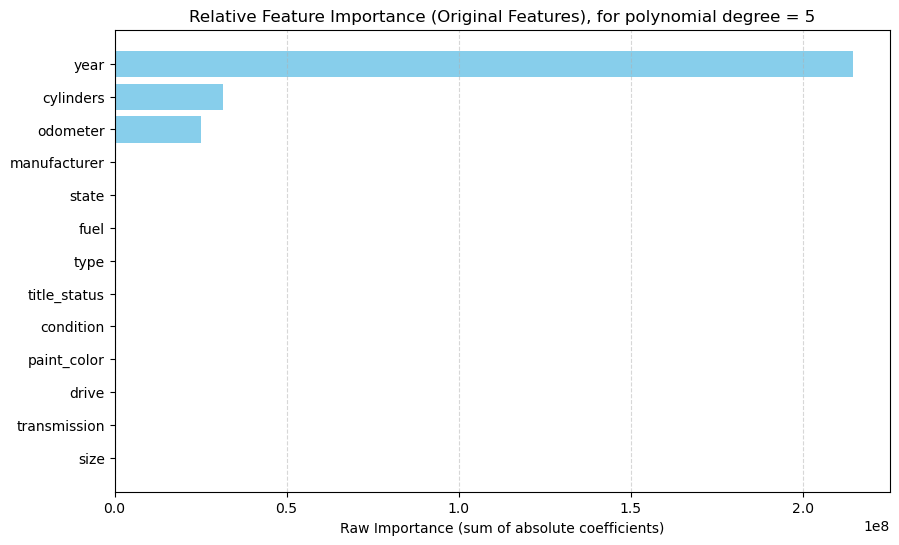

In [40]:

# ---------------------- Horizontal bar chart ----------------------
plt.figure(figsize=(10, 6))

plt.barh(
    importance_table["Feature"],
    importance_table["Raw Importance"],
    color="skyblue"
)

plt.xlabel("Raw Importance (sum of absolute coefficients)")
plt.title(f"Relative Feature Importance (Original Features), for polynomial degree = {winning_degree}")
plt.gca().invert_yaxis()   # Highest importance at top
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

#### Observations:

Graphically, we confirm that the importance of 'year' is far greater than the next feature of 'cylinders'. 'Cylinders' and 'odometer' are not too far apart (same order of magnitude). Then manufacturer is the 4th most influential feature but significantly lower than odometer. Compared with 'year', the 'manufacturer' is too small to event register on the bar chart above.


#### Simplified and cleaned chart:

Cleaned up chart to use in the final report (under 'Deployment'):


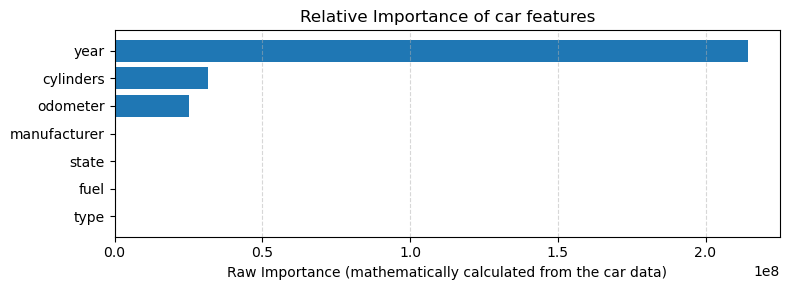

In [41]:
import os

#----------------- Clean and simplify chart for clients -----------------
top_n = 7

plot_df = importance_table.head(top_n)

plt.figure(figsize=(8, 3))
plt.barh(plot_df["Feature"], plot_df["Raw Importance"])

plt.xlabel("Raw Importance (mathematically calculated from the car data)")
plt.title("Relative Importance of car features")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)

#----- Save chart in a new image directory for clients' final report -----

outfile = "relative_importance_top7.jpg"
outdir = "images_of_results"

os.makedirs("images_of_results", exist_ok=True)
outfile = os.path.join(outdir, "relative_importance_top7.jpg")
plt.savefig(outfile, dpi=300, bbox_inches="tight")

# Print out where the file is saved (i.e. the current working directory path:
# import os
# print("Saved to:", os.path.abspath("relative_importance_top7.jpg"))

#----------------- Display the simplified chart here also -----------------
plt.tight_layout()
plt.show()


### 5. The 'year' of manufacture's pattern in relation to price- client and data anylist focus
###    (What is the shape for the most influential feature)

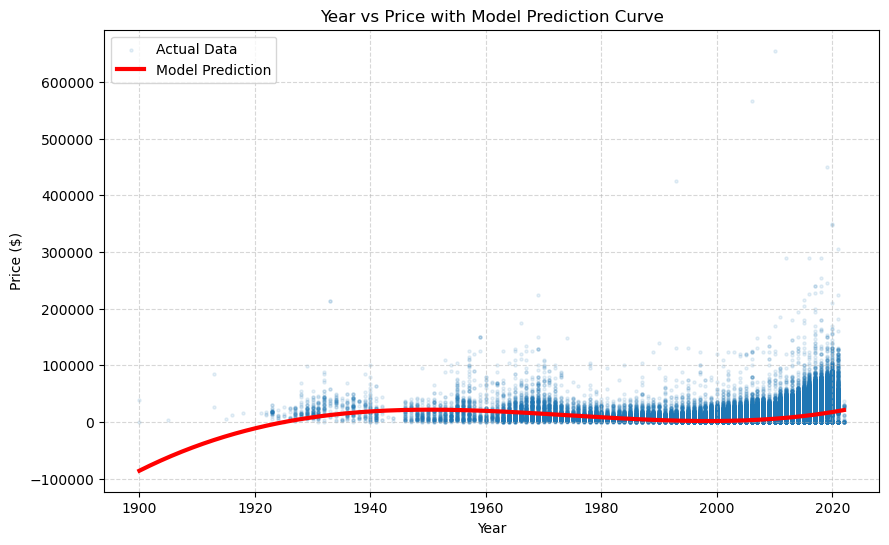

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- 1. Scatter plot of raw data ----
plt.figure(figsize=(10,6))
plt.scatter(cars["year"], cars["price"], alpha=0.1, s=5, label="Actual Data")

# ---- 2. Build a synthetic dataset for prediction curve ----

# Create a smooth range of years
year_range = np.linspace(cars["year"].min(), cars["year"].max(), 200)

# Build a DataFrame that matches my model's input structure
curve_df = pd.DataFrame({
    "year": year_range,
    "odometer": cars["odometer"].median(),      # fix odometer at typical value
    "cylinders": cars["cylinders"].median(),    # fix cylinders at typical value
    "manufacturer": "ford",                     # pick ANY valid category
    "condition": "good",
    "fuel": "gas",
    "title_status": "clean",
    "transmission": "automatic",
    "drive": "fwd",
    "size": "mid-size",
    "type": "sedan",
    "paint_color": "white",
    "state": "ca"
})

# ---- 3. Predict prices using my best model ----
predicted_prices = best_model.predict(curve_df)

# ---- 4. Plot the prediction curve ----
plt.plot(year_range, predicted_prices, color="red", linewidth=3, label="Model Prediction")

# ---- Labels ----
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("Year vs Price with Model Prediction Curve")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Observations:

When we examined the most influential polynominal features, we saw these near the top of the list:

- year<sup>3</sup> x cylinders<sup>2</sup>
- year x cylinders<sup>2</sup>
- year<sup>5</sup>


As we look at the curve of the year and its affect on price, we can see the complexity of the curve that that needed a polynomial of degree 5 to raise year to the power of 5. A simple linear solution would not fit well, nor would a simple quadratic (year<sup>2</sup>) since this would only allow for one downward curve.


### 6. Have we met the business goal of this investigation? Not yet

#### Observations:

It is time to review whether we are closer to meeting the business goal.

**Business Goal:** to understand what factors make a car more or less expensive - what do consumers value in a used car?

So we can now say that these features most affect the price:
- Year, cylinders, odometer and manufacturer

We now also know more specifically for the highly influential feature of 'year', the value starts to drop away for cars around 20 years old (see graph above) but value is added to the price for cars before 1980 (or 1970).

This is helpful. However, we fall short currently for knowing what number of cylinders is most valued, as with which kinds of odometer readings customer's value and especially which brands of 'manufacturer' the customer's value the most.

We will now seek to determine these things.


### 7. Which VALUES of the original main features are most valued? - client focus

In [43]:

top_features = 5
value_number = 3
table_output_file_name = "top_features_table.jpg"

top_feature_list = importance_table["Feature"].head(top_features).tolist()
values_tables = []

# ------------------------------------------------------------
#     Function: format a number for dollars and cents 
# ------------------------------------------------------------
def format_currency(x):
    return "$" + format(x, ",.2f")


# ----------------------------------------------------------------
#     Function: compute ranking for one feature (cat or num)
# ----------------------------------------------------------------
def feature_ranking(cars, col):
    if col in cat_features:
        ranking = cars.groupby(col)["price"].mean().sort_values(ascending=False)
        

    elif col in num_features:
        if col == "odometer":
            # bin odometer into deciles, then rank bins by average price
            binned = pd.qcut(cars[col], q=10, duplicates="drop")
            ranking = cars.groupby(binned,observed=True)["price"].mean().sort_values(ascending=False)
    
        elif col == "year":
            # bin year into 5-year buckets (e.g., 2000–2004, 2005–2009, ...)
            year_min = cars[col].min()
            year_max = cars[col].max()

            # create bin edges aligned to 5-year boundaries
            start = (year_min // 5) * 5
            end = ((year_max // 5) + 1) * 5

            bins = list(range(int(start), int(end) + 1, 5))
            labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

            binned = pd.cut(cars[col], bins=bins, right=False, labels=labels, include_lowest=True)
            ranking = cars.groupby(binned, observed=True)["price"].mean().sort_values(ascending=False)

        else:
            ranking = cars.groupby(col)["price"].mean().sort_values(ascending=False)

    else:
        raise ValueError(f"{col} not found in cat_features or num_features")
    
    # Keep only the top value_number entries
    ranking = ranking.head(value_number)

    # Format output
    ranking_df = ranking.to_frame(name="Average Price")
    ranking_df["Average Price"] = ranking_df["Average Price"].apply(format_currency)

    return ranking_df

    
# ----------------------------------------------------------------
#       Print rankings for only the selected top features
# ----------------------------------------------------------------

for col in top_feature_list:
    ranking_df = feature_ranking(cars, col)
    if ranking_df is None:
        continue

    # IMPORTANT: keep index as a column
    df = ranking_df.reset_index()

    # Rename the index column to the feature name (e.g., year, cylinders)
    df.columns = [col, "Average Price"]

    values_tables.append((col.capitalize(), df))


# ---------- Make figure big enough ----------
total_rows = sum(len(df) for _, df in values_tables)
fig_height = 1.5 + 0.55 * total_rows + 0.9 * len(values_tables)

fig, ax = plt.subplots(figsize=(10, fig_height))
ax.axis("off")

y = 0.98  # start near top

for title, df in values_tables:
    # section title
    ax.text(0.01, y, f"{title} (top {value_number} values)", fontsize=12, fontweight="bold",
            transform=ax.transAxes, va="top")
    y -= 0.04

    # draw table
    row_h = 0.028
    h = row_h * (len(df) + 1)

    tbl = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="left",
        colLoc="left",
        loc="upper left",
        bbox=[0.01, y - h, 0.98, h]
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.1)

    # Bold column headers
    for (r, c), cell in tbl.get_celld().items():
        if r == 0:
            cell.set_text_props(weight="bold")

    y -= (h + 0.06)


# ------ Save the table of the top features and their values ------

outdir = "images_of_results"
os.makedirs(outdir, exist_ok=True)

outfile = os.path.join(outdir, table_output_file_name)

plt.savefig(outfile, dpi=300, bbox_inches="tight")
plt.close()

# print(f"Saved summary image to: {outfile}")

<img src="images_of_results/top_features_table.jpg" width="550">

## 8. Conclusion:

Our business goal is:

**Business Goal:** to understand what factors make a car more or less expensive - what do consumers value in a used car?

Our conclusion is that four features most significantly affect the price. Other factors affect the price but to significantly less degree. We now also know what in particular about those features are valued the most. In order of most influential:
1. **year**
   The most valued 10 year period is 2020-2029, followed by 1910-1919, then 1930-1939.
   
3. **cylinders**
   The most valued are 12 cylinder vehicles, followed by 8 cylinder vehicles.

   
5. **odometer**
   The most valued are cars with under 24,471 km on the odometer (top decile = top 10%).

   
7. **manufacturer**
    The most valued manufactuers are: Ferrari, Aston-Marton and Tesla.

   

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Final Report for Client:



**Business Goal:** to understand what factors make a car more or less expensive - what do consumers value in a used car?

#### 1. Car features that weigh most heavily on car price:

Our conclusion is that four features most significantly affect the price. Other factors affect the price but to significantly less degree.

We have confirmed that the importance of 'year' is far greater than the next feature of 'cylinders'. 'Cylinders' and 'odometer' are not too far apart (same order of magnitude). Then manufacturer is the fourth most influential feature but significantly lower than odometer. Compared with 'year', the 'manufacturer' is too small to even register on the bar chart below.

<img src="images_of_results/relative_importance_top7.jpg" width="700">


#### 2. Values that affect the price for the most influential car features:

We now also know what entries in particular for those features are valued the most. Starting with the most influential and then listing others with decreasing influence, they are:
1. **year**
   The most valued 10 year period is 2020-2029, followed by 1910-1919, then 1930-1939.
   
3. **cylinders**
   The most valued are 12 cylinder vehicles, followed by 8 cylinder vehicles.

   
5. **odometer**
   The most valued are cars with under 24,471 km on the odometer (top decile = top 10%).

   
7. **manufacturer**
    The most valued manufactuers are: Ferrari, Aston-Marton and Tesla.


<img src="images_of_results/top_features_table.jpg" width="550">


End of Notebook